# Monopoly Streets

In [1]:
# import packages
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# download Open Road data from OS data hub
gpkg="C:/GIS/Roads/oproad_gb.gpkg"

In [3]:
# list roads by Monopoly Board colour groupings
brown=['Old Kent Road','Whitechapel Road']
lblue=['The Angel Islington', 'Euston Road','Pentonville Road']
magenta=['Pall Mall', 'Whitehall', 'Northumberland Avenue']
orange=['Bow Street', 'Marlborough Street', 'Vine Street']
red=['The Strand', 'Fleet Street', 'Trafalgar Square']
yellow = ['Leicester Square', 'Coventry Street', 'Piccadilly']
green=['Regent Street', 'Oxford Street','Bond Street']
dblue=['Park Lane', 'Mayfair']

In [4]:
# read in road link shape
gdfRoad=gpd.read_file(gpkg,layer="RoadLink")
gdfRoad.sample(3)

,id,endNode,startNode,roadNumberTOID,roadNameTOID,fictitious,roadClassification,roadFunction,formOfWay,length,...,loop,primaryRoute,trunkRoad,roadClassificationNumber,name1,name1_lang,name2,name2_lang,roadStructure,geometry
847455,id23140953-3923-4427-A0B1-2C66B1AEBC37,id5DD08EDB-B825-439A-B5D2-674D3FEFF475,idCB0948BF-126D-48FD-8A09-F97C2C45D738,None,None,False,Unknown,Restricted Local Access Road,Single Carriageway,1587,...,False,False,False,None,None,None,None,None,None,"LINESTRING (350798.000 438179.000, 350813.010 ..."
707744,id307CFC73-208A-44CB-BA09-21DD08A9065E,idFF100B2A-BD47-46E5-B7D1-D0F993FC078A,id10C59BA3-D80D-4E5C-9184-81CA62E4443E,None,osgb4000000009418929,False,Unclassified,Local Road,Single Carriageway,113,...,False,False,False,None,Broomfield Close,None,None,None,None,"LINESTRING (376189.290 410032.290, 376181.000 ..."
1825831,idCF1950D8-664A-4ABC-BEEE-8F2452169319,id5D10B6E6-9D82-4E89-97B5-FFF2A7B56750,idAFAABF34-0DE7-41DA-9A72-933B72798939,None,osgb4000000017967339,False,Unclassified,Local Road,Single Carriageway,71,...,False,False,False,None,Racecourse Drive,None,None,None,None,"LINESTRING (370594.000 293533.000, 370569.500 ..."


In [5]:
# select only Central London area
gdfLon = gdfRoad.cx[527000:535000,177000:185000]

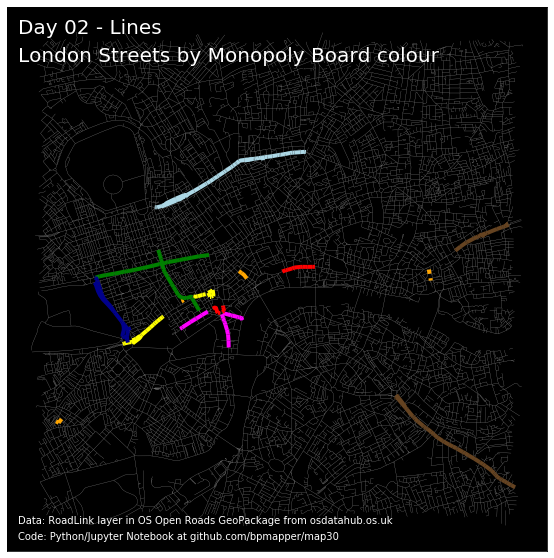

In [7]:
# plot roads and each Monopoly grouping
fig, ax=plt.subplots(figsize=(10,10))
gdfLon.plot(ax=ax, color='silver', linewidth=0.2)

gdfLon[gdfLon.name1.isin(brown)].plot(ax=ax, color='#654321',linewidth = 4)
gdfLon[gdfLon.name1.isin(lblue)].plot(ax=ax, color='lightblue',linewidth = 4)
gdfLon[gdfLon.name1.isin(magenta)].plot(ax=ax, color='magenta',linewidth = 4)
gdfLon[gdfLon.name1.isin(orange)].plot(ax=ax, color='orange',linewidth = 4)
gdfLon[gdfLon.name1.isin(red)].plot(ax=ax, color='red',linewidth = 4)
gdfLon[gdfLon.name1.isin(yellow)].plot(ax=ax, color='yellow',linewidth = 4)
gdfLon[gdfLon.name1.isin(green)].plot(ax=ax, color='green',linewidth = 4)
gdfLon[gdfLon.name1.isin(dblue)].plot(ax=ax, color='darkblue',linewidth = 4)

ax.text(.02,.95,'Day 02 - Lines',transform=ax.transAxes, fontsize=20).set_color('white')
ax.text(.02,.90,'London Streets by Monopoly Board colour',transform=ax.transAxes, fontsize=20).set_color('white')       
ax.text(.02,.05,'Data: RoadLink layer in OS Open Roads GeoPackage from osdatahub.os.uk',transform=ax.transAxes, fontsize=10).set_color('white')       
ax.text(.02,.02,'Code: Python/Jupyter Notebook at github.com/bpmapper/map30',transform=ax.transAxes, fontsize=10).set_color('white')       
plt.tick_params(axis='both',which='both',bottom=False,left=False,labelbottom=False,labelleft=False)
ax.set_facecolor('black')
plt.show()
fig.savefig('Day02_Lines.png')
